In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

import math
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv("data2.csv",sep=',', header=0,encoding='cp1252')
data.head()

No.                 Time        Source   Destination Protocol  Length  \
0    1  2017-01-19 15:32:52  103.241.4.11  10.100.115.6      TCP      54   
1    2  2017-01-19 15:32:52  103.241.4.11  10.100.115.6      TCP      54   
2    3  2017-01-19 15:32:52  10.100.115.6       8.8.8.8      DNS      81   
3    4  2017-01-19 15:32:52  103.241.4.11  10.100.115.6      TCP    1514   
4    5  2017-01-19 15:32:52  10.100.115.6       8.8.8.8      DNS      69   

                                            Info  Port Source  \
0   80  >  51107 [ACK] Seq=1 Ack=1 Win=125 Len=0         80.0   
1   80  >  51106 [ACK] Seq=1 Ack=1 Win=125 Len=0         80.0   
2  Standard query 0xe327 A iconbuild.unsri.ac.id      53204.0   
3             [TCP segment of a reassembled PDU]         80.0   
4              Standard query 0x3f99 A olx.co.id      62147.0   

   Port Destination    Hardware Source Hardware Destination  
0           51107.0      Dell_43:98:fb    AsustekC_d8:32:6a  
1           51106.0      Dell_43:98:fb    AsustekC_d8:32:6a  
2              53.0  AsustekC_d8:32:6a        Dell_43:98:fb  
3           51106.0      Dell_43:98:fb    AsustekC_d8:32:6a  
4              53.0  AsustekC_d8:32:6a        Dell_43:98:fb

In [3]:
print("Informasi Data")
print("IP Source : ", data['Source'].unique())
print("IP Destination : ", data['Destination'].unique())
print("Protocols : ", data['Protocol'].unique())
print("Information : ",data['Info'].unique())
print("Ports Source: ",data['Port Source'].unique())
print("Ports Destination: ",data['Port Destination'].unique())
print("Hardware Source : ", data['Hardware Source'].unique())
print("Hardware Destination : ", data['Hardware Destination'].unique())

Informasi Data
('IP Source : ', array([u'103.241.4.11', u'10.100.115.6', u'10.100.115.1', u'10.100.115.2',
       u'111.119.22.180', u'8.8.8.8', u'74.125.200.102', u'74.125.200.101',
       u'103.241.4.14', u'10.100.115.4', u'74.125.200.191',
       u'74.125.200.132', u'10.100.115.5', u'74.125.200.19',
       u'203.205.144.183', u'74.125.200.154', u'103.241.4.4',
       u'74.125.200.94', u'66.235.159.165', u'104.31.141.49',
       u'74.125.200.84', u'117.18.237.29', u'23.15.155.27',
       u'23.15.248.221', u'23.15.152.194', u'66.117.25.58',
       u'65.55.252.93', u'203.77.191.1', u'31.13.66.36', u'23.15.153.212',
       u'74.125.200.93', u'74.125.200.95', u'23.15.250.40', u'31.13.74.1',
       u'157.240.7.26', u'104.43.203.255', u'23.197.61.24',
       u'54.179.139.139', u'104.18.40.61', u'74.125.200.103',
       u'fe80::45ec:1aea:8299:610e', u'Dell_43:98:fb',
       u'CompalIn_41:a2:28', u'103.229.206.84', u'74.125.200.139',
       u'74.125.200.113', u'173.208.177.162', u'74.125.200

In [4]:
#Inspecting type
data.dtypes

No.                       int64
Time                     object
Source                   object
Destination              object
Protocol                 object
Length                    int64
Info                     object
Port Source             float64
Port Destination        float64
Hardware Source          object
Hardware Destination     object
dtype: object

In [5]:
data.notnull().sum()

No.                     959858
Time                    959858
Source                  959858
Destination             959858
Protocol                959858
Length                  959858
Info                    959858
Port Source             959389
Port Destination        959389
Hardware Source         959858
Hardware Destination    959858
dtype: int64

In [6]:
data.notnull().sum() * 100.0/data.shape[0]

No.                     100.000000
Time                    100.000000
Source                  100.000000
Destination             100.000000
Protocol                100.000000
Length                  100.000000
Info                    100.000000
Port Source              99.951139
Port Destination         99.951139
Hardware Source         100.000000
Hardware Destination    100.000000
dtype: float64

In [7]:
data.sort_values(['Time'], inplace=True)
data.head()

No.                 Time          Source     Destination Protocol  \
0      1  2017-01-19 15:32:52    103.241.4.11    10.100.115.6      TCP   
809  810  2017-01-19 15:32:52    10.100.115.6  74.125.200.102      TCP   
808  809  2017-01-19 15:32:52  74.125.200.102    10.100.115.6  TLSv1.2   
807  808  2017-01-19 15:32:52    10.100.115.6         8.8.8.8      DNS   
806  807  2017-01-19 15:32:52    10.100.115.6  74.125.200.102      TCP   

     Length                                               Info  Port Source  \
0        54       80  >  51107 [ACK] Seq=1 Ack=1 Win=125 Len=0         80.0   
809      90  51057  >  443 [ACK] Seq=1810 Ack=12717 Win=921...      51057.0   
808    1484         [TCP Fast Retransmission] Application Data        443.0   
807      76           Standard query 0x55dc A baak.unsri.ac.id      52504.0   
806      90  [TCP Dup ACK 718#15] 51057  >  443 [ACK] Seq=1...      51057.0   

     Port Destination    Hardware Source Hardware Destination  
0             51107.0      Dell_43:98:fb    AsustekC_d8:32:6a  
809             443.0  AsustekC_d8:32:6a        Dell_43:98:fb  
808           51057.0      Dell_43:98:fb    AsustekC_d8:32:6a  
807              53.0  AsustekC_d8:32:6a        Dell_43:98:fb  
806             443.0  AsustekC_d8:32:6a        Dell_43:98:fb

In [8]:
data.Protocol.value_counts(ascending=False)

TCP         677305
TLSv1.2     198997
QUIC         70292
DNS           4128
HTTP          4110
TLSv1         3840
ARP            294
OCSP           205
LLMNR          178
SSDP           130
ICMPv6          81
IGMPv3          78
NBNS            53
DHCPv6          44
DHCP            24
PPTP            24
BROWSER         21
MDNS            19
HTTP/XML        13
PPP LCP         12
SSH              5
LLDP             4
SSL              1
Name: Protocol, dtype: int64

In [9]:
# Looking at the normalized values makes the picture clearer.
# Note: 'normalize=False' excludes the 'NaN's where here it includes them
data.Protocol.value_counts(ascending=False, dropna=False, normalize=True)

TCP         0.705630
TLSv1.2     0.207319
QUIC        0.073232
DNS         0.004301
HTTP        0.004282
TLSv1       0.004001
ARP         0.000306
OCSP        0.000214
LLMNR       0.000185
SSDP        0.000135
ICMPv6      0.000084
IGMPv3      0.000081
NBNS        0.000055
DHCPv6      0.000046
DHCP        0.000025
PPTP        0.000025
BROWSER     0.000022
MDNS        0.000020
HTTP/XML    0.000014
PPP LCP     0.000013
SSH         0.000005
LLDP        0.000004
SSL         0.000001
Name: Protocol, dtype: float64

In [10]:
infodata=data[['Time','Source','Destination','Protocol','Length','Info']]
infodata.head()

Time          Source     Destination Protocol  Length  \
0    2017-01-19 15:32:52    103.241.4.11    10.100.115.6      TCP      54   
809  2017-01-19 15:32:52    10.100.115.6  74.125.200.102      TCP      90   
808  2017-01-19 15:32:52  74.125.200.102    10.100.115.6  TLSv1.2    1484   
807  2017-01-19 15:32:52    10.100.115.6         8.8.8.8      DNS      76   
806  2017-01-19 15:32:52    10.100.115.6  74.125.200.102      TCP      90   

                                                  Info  
0         80  >  51107 [ACK] Seq=1 Ack=1 Win=125 Len=0  
809  51057  >  443 [ACK] Seq=1810 Ack=12717 Win=921...  
808         [TCP Fast Retransmission] Application Data  
807           Standard query 0x55dc A baak.unsri.ac.id  
806  [TCP Dup ACK 718#15] 51057  >  443 [ACK] Seq=1...

In [11]:
group_data=infodata.groupby(['Source','Destination','Protocol']).sum()
group_data.head()

Length
Source       Destination  Protocol        
10.100.115.1 10.100.115.2 DHCP        1026
                          SSH          744
             10.100.115.4 DHCP        1026
                          DNS        62209
             10.100.115.5 DHCP        1026

In [12]:
group_data.unstack().head()

Length                                       \
Protocol                     ARP BROWSER    DHCP DHCPv6      DNS HTTP   
Source       Destination                                                
10.100.115.1 10.100.115.2    NaN     NaN  1026.0    NaN      NaN  NaN   
             10.100.115.4    NaN     NaN  1026.0    NaN  62209.0  NaN   
             10.100.115.5    NaN     NaN  1026.0    NaN  57704.0  NaN   
             10.100.115.6    NaN     NaN  1026.0    NaN  64728.0  NaN   
10.100.115.2 10.100.115.1    NaN     NaN  1053.0    NaN      NaN  NaN   

                                                        ...                 \
Protocol                  HTTP/XML ICMPv6 IGMPv3 LLDP   ...   OCSP PPP LCP   
Source       Destination                                ...                  
10.100.115.1 10.100.115.2      NaN    NaN    NaN  NaN   ...    NaN     NaN   
             10.100.115.4      NaN    NaN    NaN  NaN   ...    NaN     NaN   
             10.100.115.5      NaN    NaN    NaN  NaN   ...    NaN     NaN   
             10.100.115.6      NaN    NaN    NaN  NaN   ...    NaN     NaN   
10.100.115.2 10.100.115.1      NaN    NaN    NaN  NaN   ...    NaN     NaN   

                                                                          
Protocol                  PPTP QUIC SSDP    SSH SSL    TCP TLSv1 TLSv1.2  
Source       Destination                                                  
10.100.115.1 10.100.115.2  NaN  NaN  NaN  744.0 NaN    NaN   NaN     NaN  
             10.100.115.4  NaN  NaN  NaN    NaN NaN    NaN   NaN     NaN  
             10.100.115.5  NaN  NaN  NaN    NaN NaN    NaN   NaN     NaN  
             10.100.115.6  NaN  NaN  NaN    NaN NaN    NaN   NaN     NaN  
10.100.115.2 10.100.115.1  NaN  NaN  NaN  118.0 NaN  180.0   NaN     NaN  

[5 rows x 23 columns]

In [13]:
my_plot = group_data.plot(kind='barh',stacked=True,title="Total Packet Protocol Data",figsize=(20,1024))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [14]:
infodata2=data[['Protocol','Length']]
infodata2.head()

Protocol  Length
0        TCP      54
809      TCP      90
808  TLSv1.2    1484
807      DNS      76
806      TCP      90

In [15]:
group_data2=infodata2.groupby(['Protocol']).sum()
group_data2.head()

Length
Protocol        
ARP        14112
BROWSER     4764
DHCP        8295
DHCPv6      6676
DNS       537285

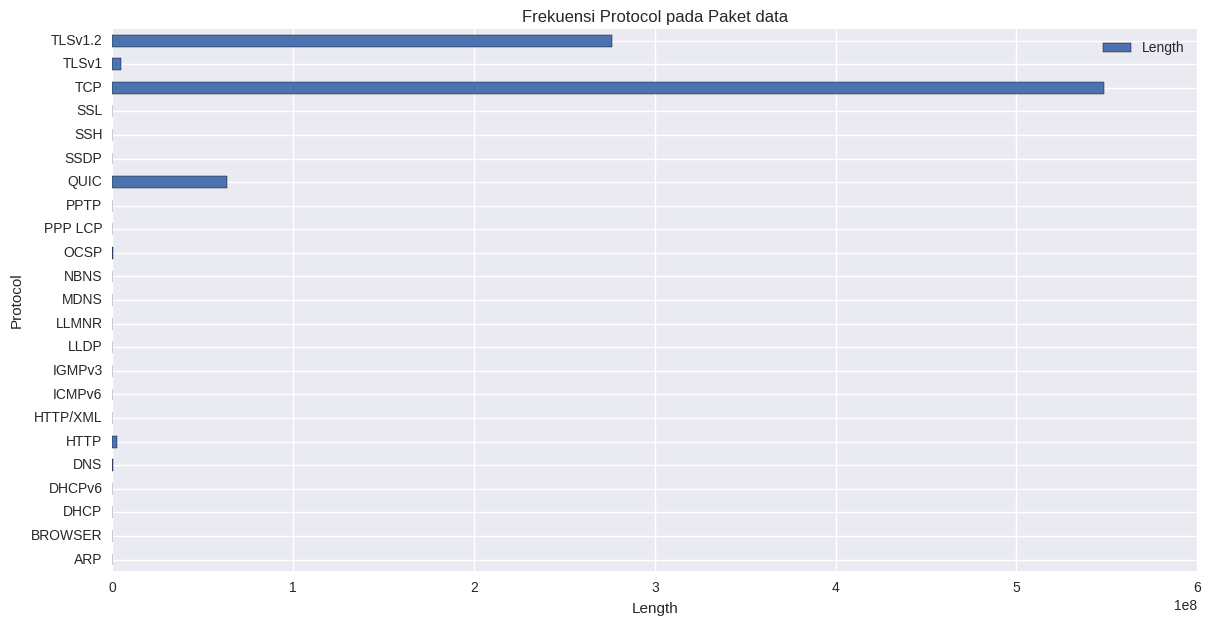

In [16]:
my_plot = group_data2.plot(kind='barh',stacked=True,title="Frekuensi Protocol pada Paket data",figsize=(14,7))
my_plot.set_xlabel("Length")
my_plot.set_ylabel("Protocol")